In [1]:
import pandas as pd
from sklearn import *
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [3]:
target = "default"

In [4]:
y = df[target]

In [5]:
y.value_counts()

1    700
2    300
Name: default, dtype: int64

In [6]:
target = "default"
X = df.drop(columns=target)

label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(df[target])

X = pd.get_dummies(X, drop_first=True)
features = X.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y
                                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(solver = "liblinear", random_state = 1))
])

pipe.fit(X_train, y_train)

# Class prediction
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Probability estimate
y_train_prob = pipe.predict_proba(X_train)[:, 1]
y_test_prob = pipe.predict_proba(X_test)[:, 1]

print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_test_pred))



print("Training accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("Test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print("Training precision:", metrics.precision_score(y_train, y_train_pred))
print("Test precision:", metrics.precision_score(y_test, y_test_pred))

print("Training recall:", metrics.recall_score(y_train, y_train_pred))
print("Test recall:", metrics.recall_score(y_test, y_test_pred))

Confusion matrix: 
 [[188  26]
 [ 47  39]]
Training accuracy: 0.7957142857142857
Test accuracy: 0.7566666666666667
Training precision: 0.6961325966850829
Test recall: 0.6
Training recall: 0.5887850467289719
Test recall: 0.45348837209302323


In [12]:
y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [7]:
(188 + 39)/len(X_test)

0.7566666666666667

In [8]:
pd.DataFrame({"actual": y_train, "prediction":y_train_pred}).head()

,actual,prediction
0,1,1
1,0,0
2,1,0
3,0,0
4,0,1


In [9]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_prob

array([0.39057174, 0.93703644, 0.20657021, 0.61518513, 0.84263414,
       0.64645627, 0.4494791 , 0.2594988 , 0.07077182, 0.213155  ,
       0.82216781, 0.47922995, 0.10628614, 0.04927787, 0.37051886,
       0.40154836, 0.02384756, 0.08634611, 0.03673578, 0.8716225 ,
       0.17347053, 0.68418377, 0.08289624, 0.08335264, 0.20201892,
       0.14277761, 0.11199784, 0.22723868, 0.08939474, 0.8914261 ,
       0.3687219 , 0.03176349, 0.45735348, 0.21773117, 0.30430631,
       0.92027889, 0.24340843, 0.4961519 , 0.1303132 , 0.0819819 ,
       0.09401154, 0.58658622, 0.009761  , 0.49218681, 0.04921602,
       0.03568655, 0.10812248, 0.27239898, 0.0533497 , 0.10149276,
       0.22215534, 0.45281983, 0.59676824, 0.51534091, 0.22166303,
       0.1454495 , 0.58814834, 0.65672602, 0.02847046, 0.59138439,
       0.43687783, 0.07374869, 0.52003891, 0.01800186, 0.56258666,
       0.25013105, 0.18103621, 0.05744698, 0.8604261 , 0.93227089,
       0.16641523, 0.22303058, 0.03080095, 0.59138775, 0.14556

In [13]:
y_train_prob = pipe.predict_proba(X_train)[:, 1]
y_test_prob = pipe.predict_proba(X_test)[:, 1]

y_train_pred = np.where(y_train_prob>0.5, 1, 0)
y_test_pred = np.where(y_test_prob>0.5, 1, 0)

print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_test_pred))

print("Training accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("Test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print("Training precision:", metrics.precision_score(y_train, y_train_pred))
print("Test recall:", metrics.precision_score(y_test, y_test_pred))

print("Training recall:", metrics.recall_score(y_train, y_train_pred))
print("Test recall:", metrics.recall_score(y_test, y_test_pred))

Confusion matrix: 
 [[188  26]
 [ 47  39]]
Training accuracy: 0.7957142857142857
Test accuracy: 0.7566666666666667
Training precision: 0.6961325966850829
Test recall: 0.6
Training recall: 0.5887850467289719
Test recall: 0.45348837209302323


In [14]:
y_train_prob = pipe.predict_proba(X_train)[:, 1]
y_test_prob = pipe.predict_proba(X_test)[:, 1]

y_train_pred = np.where(y_train_prob>0.2, 1, 0)
y_test_pred = np.where(y_test_prob>0.2, 1, 0)

print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_test_pred))

print("Training accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("Test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print("Training precision:", metrics.precision_score(y_train, y_train_pred))
print("Test recall:", metrics.precision_score(y_test, y_test_pred))

print("Training recall:", metrics.recall_score(y_train, y_train_pred))
print("Test recall:", metrics.recall_score(y_test, y_test_pred))

Confusion matrix: 
 [[129  85]
 [ 21  65]]
Training accuracy: 0.6928571428571428
Test accuracy: 0.6466666666666666
Training precision: 0.49866666666666665
Test recall: 0.43333333333333335
Training recall: 0.8738317757009346
Test recall: 0.7558139534883721


In [15]:
y_train_prob = pipe.predict_proba(X_train)[:, 1]
y_test_prob = pipe.predict_proba(X_test)[:, 1]

y_train_pred = np.where(y_train_prob>0.8, 1, 0)
y_test_pred = np.where(y_test_prob>0.8, 1, 0)

print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_test_pred))

print("Training accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("Test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print("Training precision:", metrics.precision_score(y_train, y_train_pred))
print("Test recall:", metrics.precision_score(y_test, y_test_pred))

print("Training recall:", metrics.recall_score(y_train, y_train_pred))
print("Test recall:", metrics.recall_score(y_test, y_test_pred))

Confusion matrix: 
 [[209   5]
 [ 71  15]]
Training accuracy: 0.7314285714285714
Test accuracy: 0.7466666666666667
Training precision: 0.8823529411764706
Test recall: 0.75
Training recall: 0.14018691588785046
Test recall: 0.1744186046511628


Text(0.5, 1.0, 'ROC, auc: 0.758476')

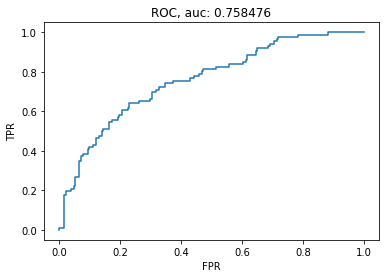

In [21]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_prob)
auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: %f" % auc)

In [24]:
summary = pd.DataFrame({"fpr": fpr, "tpr": tpr, "threshold": threshold})
summary[summary.fpr<0.2]

,fpr,tpr,threshold
0,0.000000,0.000000,1.961698
1,0.000000,0.011628,0.961698
2,0.014019,0.011628,0.930588
3,0.014019,0.174419,0.822168
4,0.023364,0.174419,0.805632
5,0.023364,0.197674,0.764420
6,0.037383,0.197674,0.742418
7,0.037383,0.209302,0.728124
8,0.046729,0.209302,0.717631
9,0.046729,0.220930,0.707083


In [25]:
est = pipe.steps[-1][-1]

In [28]:
pd.DataFrame({"feature": features, "coeff": est.coef_[0]})

,feature,coeff
0,months_loan_duration,0.312818
1,amount,0.445245
2,installment_rate,0.490867
3,residence_history,0.108905
4,age,-0.288007
5,existing_credits,0.307900
6,dependents,0.117148
7,checking_balance_< 0 DM,0.181951
8,checking_balance_> 200 DM,-0.081422
9,checking_balance_unknown,-0.574947
